## pandas入门用法(适用于python新手)

#### 1.导入依赖

In [1]:
import pandas as pd
import numpy as np

#### 2.Series用法  
Series是一纬数组存储单元，拥有index和Value两个属性。

In [2]:
s = pd.Series([1,2,3,4])
s

0    1
1    2
2    3
3    4
dtype: int64

2.1查看索引：

In [3]:
s.index

RangeIndex(start=0, stop=4, step=1)

2.2查看值：

In [4]:
s.values

array([1, 2, 3, 4])

2.3和numpy array比较：

In [5]:
np.array([1,2,3,4])

array([1, 2, 3, 4])

<font color=red>重点: 发现Series的values转化出来就是numpy array</font>

2.4通过序号取值

In [6]:
s[1]

2

<font color=green>问题: 这里的序号是不是索引呢？我们想办法改变索引，然后继续通过序号查询试试。</font>

In [7]:
s.index = ['a','b','c','d']
s

a    1
b    2
c    3
d    4
dtype: int64

In [8]:
s.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [9]:
s[1]

2

In [10]:
s.index = [7,8,9,10]
s

7     1
8     2
9     3
10    4
dtype: int64

In [11]:
s.index

Int64Index([7, 8, 9, 10], dtype='int64')

In [12]:
s[7]

1

<font color=red>重点:  
    Series是有序的,Series默认的索引是从0开始的数字。如果要重置索引，分两种情况：  
    1.重置成字符串索引：通过字符串和默认的索引都能访问到值  
    2.重置成数字索引：会把默认索引覆盖掉，只能通过重置后的索引访问值。  
</font>

2.5通过索引取值

In [13]:
s.index = ['a','b','c','d']
s['c']

3

2.6新建Series时指定索引

In [14]:
s2 = pd.Series(np.arange(3),index=['x','y','z'])
s2

x    0
y    1
z    2
dtype: int64

<font color=green>问题: np.arange(3)是什么呢?</font>

In [15]:
np.arange(3)

array([0, 1, 2])

<font color=blue>执行发现是numpy定义自增的数组。</font>

<font color=blue>再来几个numpy arange复杂点的用法如下:</font>

In [16]:
np.arange(3,7)

array([3, 4, 5, 6])

<font color=blue>执行发现定义定是3到7之间不包含7的数组。</font>

In [17]:
np.arange(3,7,2)

array([3, 5])

<font color=blue>执行发现定义定是3到7之间不包含7的数组,并且步长是2。实际api解释的很清楚来，[想看api戳这里。](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html)</font>

<font color=blue>再来两个验证一下:</color>

In [18]:
np.arange(3,9,2)

array([3, 5, 7])

In [19]:
np.arange(3,9,3)

array([3, 6])

<font color=red>解析:[3,9)之间；递增2，结果为3，5，7；递增3，结果为3，6。</color>

2.7新建Series时不指定索引,通过dictionary定义(dict没有顺序)

In [20]:
s3 = pd.Series({'b':1.212,'a':2.113,'c':3.114,'d':4.445})
s3

a    2.113
b    1.212
c    3.114
d    4.445
dtype: float64

<font color=red>解析:发现series会根据索引首字母帮我们默认排序。</color>

2.8Series数据批处理

In [21]:
s3 * 1000

a    2113.0
b    1212.0
c    3114.0
d    4445.0
dtype: float64

In [22]:
s3

a    2.113
b    1.212
c    3.114
d    4.445
dtype: float64

<font color=red>解析:发现原本series并没有变化，证明在内存中是数据拷贝。</color>

In [23]:
s3 = s3 * 1000
s3

a    2113.0
b    1212.0
c    3114.0
d    4445.0
dtype: float64

<font color=red>解析:通过指向改变原始数据集。</color>

2.9series取出部分数据

In [24]:
s3[['a','c']]

a    2113.0
c    3114.0
dtype: float64

<font color=red>解析:通过['a','c']集合，所以在集合索引中的数据。</color>

<font color=green>问题: 变换索引顺序，会是什么结果呢?</font>

In [25]:
s3[['c','a','d','b']]

c    3114.0
a    2113.0
d    4445.0
b    1212.0
dtype: float64

In [26]:
s3[['a','c']]

a    2113.0
c    3114.0
dtype: float64

<font color=red>解析:发现结果是根据索引顺序有序展示的。</color>

2.10通过查询条件取出series部分数据

In [27]:
s3[s3 > 2000]

a    2113.0
c    3114.0
d    4445.0
dtype: float64

<font color=green>问题: s3 > 2000返回的是什么呢?执行一下:</font>

In [28]:
s3 > 2000

a     True
b    False
c     True
d     True
dtype: bool

<font color=red>解析:series会将满足条件的数据筛选出来，有点类似sql。</color>

<font color=green>问题:返回的结果到底是按照什么顺序返回的呢?举个特殊的例子试试</font>

In [29]:
s4 = pd.Series({'b':1,'a':5,'d':4,'e':3,'c':2})

In [30]:
s4

a    5
b    1
c    2
d    4
e    3
dtype: int64

In [31]:
s4[s4 > 2]

a    5
d    4
e    3
dtype: int64

<font color=red>解析:series还是按照字母排序后的索引顺序返回。</color>

2.11series高级用法

In [32]:
s3.mean()

2721.0

<font color=blue>一个函数求出平均值，感觉dd的。</font>

In [33]:
s5 = s3[['a','b']]
s5

a    2113.0
b    1212.0
dtype: float64

In [34]:
s6 = s3[['b','d']]
s6

b    1212.0
d    4445.0
dtype: float64

In [35]:
s5 + s6

a       NaN
b    2424.0
d       NaN
dtype: float64

<font color=red>解析:这里的结果是不是和大家想的不一样，看结果发现series实际上是通过index相加，找不到相同index的相加为NaN,等于取交集。</color>

#### 3.Dataframe用法  
Dataframe是多纬数组存储单元，相当于Series集合。

3.1通过dict定义df

In [36]:
data = {
    'simon': [94,2,17],
    'skyamz' : ['haha','hehe','heihei'],
    'memoryjdch':['beijing','shanghai','hangzhou']
}
umi = pd.DataFrame(data)
umi

,memoryjdch,simon,skyamz
0,beijing,94,haha
1,shanghai,2,hehe
2,hangzhou,17,heihei


<font color=red>解析:df默认也会像series一样进行首字母排序。</color>

In [37]:
umi.index

RangeIndex(start=0, stop=3, step=1)

<font color=red>解析:df纵轴为索引。</color>

In [38]:
umi.columns

Index(['memoryjdch', 'simon', 'skyamz'], dtype='object')

<font color=red>解析:df横轴为列名。</color>

In [39]:
umi.dtypes

memoryjdch    object
simon          int64
skyamz        object
dtype: object

<font color=red>解析:df查看每个column的类型。</color>

In [40]:
umi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
memoryjdch    3 non-null object
simon         3 non-null int64
skyamz        3 non-null object
dtypes: int64(1), object(2)
memory usage: 152.0+ bytes


<font color=red>解析:查看df信息。</color>

In [41]:
umi.values

array([['beijing', 94, 'haha'],
       ['shanghai', 2, 'hehe'],
       ['hangzhou', 17, 'heihei']], dtype=object)

<font color=red>解析:转化成了numpy 多纬数组。</color>

3.2设置某列值为df索引

In [42]:
umi = umi.set_index('skyamz')
umi

,memoryjdch,simon
skyamz,,
haha,beijing,94
hehe,shanghai,2
heihei,hangzhou,17


<font color=red>解析:以前的数字索引被skyamz列的值替换。</color>

In [43]:
umi

,memoryjdch,simon
skyamz,,
haha,beijing,94
hehe,shanghai,2
heihei,hangzhou,17


In [44]:
umi['simon']

skyamz
haha      94
hehe       2
heihei    17
Name: simon, dtype: int64

<font color=red>解析:获取某列，这一竖列就是一个series。</color>

In [45]:
umi['memoryjdch'] + "-" + (umi['simon']/100).astype('str')

skyamz
haha       beijing-0.94
hehe      shanghai-0.02
heihei    hangzhou-0.17
dtype: object

<font color=red>解析:多列操作，注意类型。</color>

In [46]:
umi = umi.reset_index()
umi

,skyamz,memoryjdch,simon
0,haha,beijing,94
1,hehe,shanghai,2
2,heihei,hangzhou,17


<font color=red>解析:重置索引。</color>

In [47]:
umi['heihei'] = umi['memoryjdch'] + "-" + (umi['simon']/100).astype('str')
umi

,skyamz,memoryjdch,simon,heihei
0,haha,beijing,94,beijing-0.94
1,hehe,shanghai,2,shanghai-0.02
2,heihei,hangzhou,17,hangzhou-0.17


<font color=red>解析:通过计算的数据新建列，这也是特征提取的过程。</color>

In [48]:
umi[umi['simon'] > 2]

,skyamz,memoryjdch,simon,heihei
0,haha,beijing,94,beijing-0.94
2,heihei,hangzhou,17,hangzhou-0.17


<font color=red>解析:类似series筛选部分数据。</color>

In [49]:
umi.sort_values(by = 'simon',ascending = False)

,skyamz,memoryjdch,simon,heihei
0,haha,beijing,94,beijing-0.94
2,heihei,hangzhou,17,hangzhou-0.17
1,hehe,shanghai,2,shanghai-0.02


In [50]:
umi.sort_values(by = 'simon',ascending = True)

,skyamz,memoryjdch,simon,heihei
1,hehe,shanghai,2,shanghai-0.02
2,heihei,hangzhou,17,hangzhou-0.17
0,haha,beijing,94,beijing-0.94


<font color=red>解析:对df进行排序,by 排序的字段，ascending是否升序排列。</color>

In [51]:
umi.drop([0], axis = 0)

,skyamz,memoryjdch,simon,heihei
1,hehe,shanghai,2,shanghai-0.02
2,heihei,hangzhou,17,hangzhou-0.17


In [52]:
umi

,skyamz,memoryjdch,simon,heihei
0,haha,beijing,94,beijing-0.94
1,hehe,shanghai,2,shanghai-0.02
2,heihei,hangzhou,17,hangzhou-0.17


In [53]:
umi.drop(['heihei'], axis = 1)

,skyamz,memoryjdch,simon
0,haha,beijing,94
1,hehe,shanghai,2
2,heihei,hangzhou,17


<font color=red>解析:对df进行删除操作，axis指定删除操作，0为行，1为列。</color>

In [54]:
umi.describe()

,simon
count,3.000000
mean,37.666667
std,49.359227
min,2.000000
25%,9.500000
50%,17.000000
75%,55.500000
max,94.000000


<font color=red>解析:df的基础统计信息。</color>

In [55]:
umi[['simon','memoryjdch']]

,simon,memoryjdch
0,94,beijing
1,2,shanghai
2,17,hangzhou


<font color=red>解析:df取出多列。</color>

In [56]:
umi[1:3]

,skyamz,memoryjdch,simon,heihei
1,hehe,shanghai,2,shanghai-0.02
2,heihei,hangzhou,17,hangzhou-0.17


In [57]:
umi[:2]

,skyamz,memoryjdch,simon,heihei
0,haha,beijing,94,beijing-0.94
1,hehe,shanghai,2,shanghai-0.02


<font color=red>解析:df取行，[1:3]意义是[1,3)为索引1,2，[:2]意义为[0,2)为索引0,1。</color>

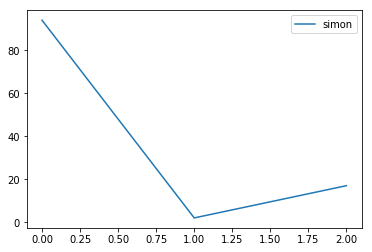

In [58]:
%matplotlib inline
umi.plot()

<font color=red>解析:matplotlib是最著名的Python图表绘制扩展库，它支持输出多种格式的图形图像，并且可以使用多种GUI界面库交互式地显示图表。使用%matplotlib命令可以将matplotlib的图表直接嵌入到Notebook之中，或者使用指定的界面库显示图表，它有一个参数指定matplotlib图表的显示方式。inline表示将图表嵌入到Notebook中。</color>

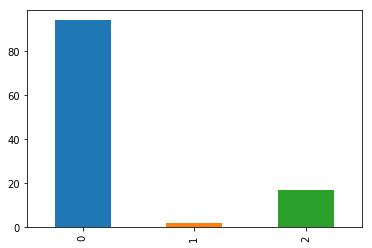

In [59]:
umi['simon'].plot(kind = 'bar')

<font color=red>解析:取出df部分数据进行绘制，kind指定图形类型，bar为柱状图。</color>

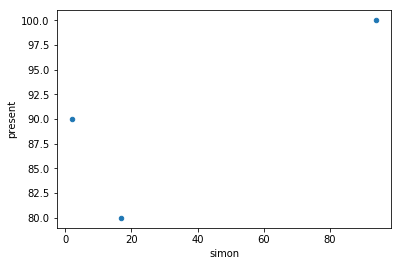

In [60]:
umi['present'] = [100,90,80]
umi.plot(kind = 'scatter',x ='simon' , y ='present')

<font color=red>解析:取出df多列数据进行绘制，kind指定图形类型，x指定x轴，指定x轴。</color>

In [61]:
umi

,skyamz,memoryjdch,simon,heihei,present
0,haha,beijing,94,beijing-0.94,100
1,hehe,shanghai,2,shanghai-0.02,90
2,heihei,hangzhou,17,hangzhou-0.17,80


In [62]:
umi.loc[1,'simon']

2

<font color=red>解析:搜索索引为1，列名为simon的单元格内容。</color>

In [63]:
umi.loc[0:2 , :]

,skyamz,memoryjdch,simon,heihei,present
0,haha,beijing,94,beijing-0.94,100
1,hehe,shanghai,2,shanghai-0.02,90
2,heihei,hangzhou,17,hangzhou-0.17,80


In [64]:
umi.loc[:]

,skyamz,memoryjdch,simon,heihei,present
0,haha,beijing,94,beijing-0.94,100
1,hehe,shanghai,2,shanghai-0.02,90
2,heihei,hangzhou,17,hangzhou-0.17,80


In [65]:
umi.loc[: , ['memoryjdch','skyamz']]

,memoryjdch,skyamz
0,beijing,haha
1,shanghai,hehe
2,hangzhou,heihei


In [66]:
umi.loc[0:2 , ['memoryjdch','skyamz']]

,memoryjdch,skyamz
0,beijing,haha
1,shanghai,hehe
2,hangzhou,heihei


In [67]:
umi.loc[umi['simon']>2,['memoryjdch','simon','skyamz']]

,memoryjdch,simon,skyamz
0,beijing,94,haha
2,hangzhou,17,heihei


<font color=red>解析:通过索引和列同时查询单元格内容。</color>

In [68]:
umi

,skyamz,memoryjdch,simon,heihei,present
0,haha,beijing,94,beijing-0.94,100
1,hehe,shanghai,2,shanghai-0.02,90
2,heihei,hangzhou,17,hangzhou-0.17,80


In [69]:
umi.iloc[0:2 , 1:3]

,memoryjdch,simon
0,beijing,94
1,shanghai,2


<font color=red>解析:索引和列名都通过序号查询。</color>

In [70]:
del umi['present']
umi

,skyamz,memoryjdch,simon,heihei
0,haha,beijing,94,beijing-0.94
1,hehe,shanghai,2,shanghai-0.02
2,heihei,hangzhou,17,hangzhou-0.17


<font color=red>解析:del直接就删除列，不需要重复指向，注意和drop的区别。</color>

In [71]:
user_data = {
    'uid':[1,2,3,4,5,6],
    'name' : ['nike','lining','qiaodan','xiaohong','xiaoming','zhouxingxing'],
    'age': [24,20,17,22,18,15],
    'sex':[0,1,0,1,1,0],
    'birth_day':['2011-10-2 12:23:22','2012-01-2 13:33:22','2001-11-2 12:23:22','2014-05-2 12:23:22','2008-09-2 12:23:22','2011-10-2 12:23:22']
}
user = pd.DataFrame(user_data)
user

,age,birth_day,name,sex,uid
0,24,2011-10-2 12:23:22,nike,0,1
1,20,2012-01-2 13:33:22,lining,1,2
2,17,2001-11-2 12:23:22,qiaodan,0,3
3,22,2014-05-2 12:23:22,xiaohong,1,4
4,18,2008-09-2 12:23:22,xiaoming,1,5
5,15,2011-10-2 12:23:22,zhouxingxing,0,6


In [72]:
user.head()

,age,birth_day,name,sex,uid
0,24,2011-10-2 12:23:22,nike,0,1
1,20,2012-01-2 13:33:22,lining,1,2
2,17,2001-11-2 12:23:22,qiaodan,0,3
3,22,2014-05-2 12:23:22,xiaohong,1,4
4,18,2008-09-2 12:23:22,xiaoming,1,5


<font color=red>解析:查看user的前5条数据。</color>

In [73]:
to_view = [col for col in user.columns if 'a' in col]
to_view

['age', 'birth_day', 'name']

<font color=red>解析:  
    1.user.columns表示user这个dataframe中的所有列。  
    2.for col in user.columns表示遍历所有列。  
    3.if 'a' in col表示判断该列是否包含a。  
    总结：[col for col in user.columns if 'a' in col]表示取出所有列名中包含a的所有列。</color>

In [74]:
user[to_view]

,age,birth_day,name
0,24,2011-10-2 12:23:22,nike
1,20,2012-01-2 13:33:22,lining
2,17,2001-11-2 12:23:22,qiaodan
3,22,2014-05-2 12:23:22,xiaohong
4,18,2008-09-2 12:23:22,xiaoming
5,15,2011-10-2 12:23:22,zhouxingxing


In [75]:
column_count = sum (1 for col in user.columns if 'a' in col)
column_count

3

<font color=red>解析:  
    1.user.columns表示user这个dataframe中的所有列。  
    2.for col in user.columns表示遍历所有列。  
    3.if 'a' in col表示判断该列是否包含a。  
    总结：sum (1 for col in user.columns if 'a' in col)表示遍历所有列名中包含a的列,满足条件计数+1，然后返回统计总数。</color>

In [76]:
user

,age,birth_day,name,sex,uid
0,24,2011-10-2 12:23:22,nike,0,1
1,20,2012-01-2 13:33:22,lining,1,2
2,17,2001-11-2 12:23:22,qiaodan,0,3
3,22,2014-05-2 12:23:22,xiaohong,1,4
4,18,2008-09-2 12:23:22,xiaoming,1,5
5,15,2011-10-2 12:23:22,zhouxingxing,0,6


In [77]:
cols = user.columns.tolist()
cols

['age', 'birth_day', 'name', 'sex', 'uid']

In [78]:
cols[-1:]

['uid']

<font color=red>解析：-1是指数组中的最后一个元素。可以理解为：将切片指针的位置从数组尾部前移1位进行切片，cols[-1:]中:右侧是缺省值，默认到尾部，从最后一个元素到尾部，即取最后一个元素。</font>

<font color=blue>下面是几个例子：</font>

In [79]:
cols[-2:]

['sex', 'uid']

In [80]:
cols[-4:-2]

['birth_day', 'name']

In [81]:
cols[-1]

'uid'

In [82]:
cols[-2]

'sex'

In [83]:
cols[-2:len(cols)]  

['sex', 'uid']

In [84]:
cols = cols[-1:] + cols[:-1]
cols

['uid', 'age', 'birth_day', 'name', 'sex']

In [85]:
cols

['uid', 'age', 'birth_day', 'name', 'sex']

In [86]:
user = user[cols] # OR df = df.ix[:, cols]
user

,uid,age,birth_day,name,sex
0,1,24,2011-10-2 12:23:22,nike,0
1,2,20,2012-01-2 13:33:22,lining,1
2,3,17,2001-11-2 12:23:22,qiaodan,0
3,4,22,2014-05-2 12:23:22,xiaohong,1
4,5,18,2008-09-2 12:23:22,xiaoming,1
5,6,15,2011-10-2 12:23:22,zhouxingxing,0


<font color=red>解析：  
1.cols = user.columns.tolist()将列名取出转为list。  
2.cols = cols[-1:] + cols[:-1]：cols[-1:]指最后一列，cols[:-1]指从第一列到倒数第二列。用“+”连接两部分，此操作将第最后一列变为第一列。  
3.user = user[cols]根据新的cols重塑dataframe。</font>

<font color=green>code1是code2的语法糖写法，按照sex列进行分组，分好后对age列(单列)取平均。返回</font><font color=blue>数组：</font>

In [87]:
user.groupby('sex')['age'].mean()#code1

sex
0    18.666667
1    20.000000
Name: age, dtype: float64

In [88]:
user['age'].groupby(user['sex']).mean()#code2

sex
0    18.666667
1    20.000000
Name: age, dtype: float64

<font color=green>code3是code4的语法糖写法，按照sex列进行分组，分好后对age列(单列)取平均。返回</font><font color=blue>dataframe:</font>

In [89]:
user.groupby('sex')[['age']].mean()#code3(!)

,age
sex,
0,18.666667
1,20.000000


In [90]:
user[['age']].groupby(user['sex']).mean()#code4

,age
sex,
0,18.666667
1,20.000000


<font color=green>多列语法糖写法：按照sex列进行分组，分好后分别对age列和uid列(多列)取平均。code6这种写法是错误的！code7是code8的语法糖写法。</font>

In [91]:
user.groupby('sex')['uid','age'].mean()#code5(!)

,uid,age
sex,,
0,3.333333,18.666667
1,3.666667,20.000000


<font color=red>user['uid','age'].groupby(user['sex']).mean()</font><font color=green>#code6</font>

In [92]:
user.groupby('sex')[['uid','age']].mean()#code7

,uid,age
sex,,
0,3.333333,18.666667
1,3.666667,20.000000


In [93]:
user[['uid','age']].groupby(user['sex']).mean()#code8

,uid,age
sex,,
0,3.333333,18.666667
1,3.666667,20.000000


<font color=red>速记口诀：单列双括号（code3），双列单括号(code5)。</font>

3.3pandas导入导出文件

In [94]:
data = pd.read_csv('initdata/t_user.csv')
data

,uid,age,sex,active_date,limit
0,26308,30,1,2016-02-16,5.974677
1,78209,40,1,2016-02-21,5.292154
2,51930,35,1,2016-04-19,6.292055
3,10113,25,1,2016-03-12,6.292055
4,17067,35,1,2016-02-16,5.974677
5,46744,35,1,2015-12-17,5.974677
6,31747,30,2,2016-02-13,6.292055
7,48366,30,2,2016-01-28,5.974677
8,49725,35,1,2016-01-28,5.292154
9,31333,35,1,2016-05-17,6.292055


<font color=red>解析：读取文件通过read_*方法，这里是通过csv读取数据。</font>

In [95]:
data.to_json('t_data.json')

<font color=red>解析：读取dataframe通过to_*方法，这里是导出为json数据。</font>